# Spectral - gaussian2d

In [1]:
# Load libraries.
library("cluster")
library("stats")
library("fpc")
library("ggplot2")
library("gridExtra")
library("ggpubr")
library("kernlab")

# Set seed.
set.seed(321)

Warning message:
“package ‘cluster’ was built under R version 3.4.4”Warning message:
“package ‘fpc’ was built under R version 3.4.4”Warning message:
“package ‘ggpubr’ was built under R version 3.4.4”Loading required package: magrittr
Warning message:
“package ‘kernlab’ was built under R version 3.4.4”
Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



In [2]:
# Load the data set.
load(paste(c("data/spirals"), sep = "", collapse = ""))

In [3]:
# Scatter plot of x and y variables - color by class.
scatterPlot <- ggplot(df, aes(x.1, x.2, color = classes)) +
    geom_point(size = 2.5, alpha = 0.6) +
    scale_color_manual(values = c('#999999','#E69F00','#9ac0cd','#4682b4','#6e8b3d','#ee7600','#8b1a1a','#cd1076','#8b8970','#473c8b')) +
    theme(legend.position = c(0,1), legend.justification = c(0,1))

In [4]:
# Marginal density plot of x (top panel)
xdensity <- ggplot(df, aes(x.1, fill = classes)) + 
    geom_density(alpha = .5) + 
    scale_fill_manual(values = c('#999999','#E69F00','#9ac0cd','#4682b4','#6e8b3d','#ee7600','#8b1a1a','#cd1076','#8b8970','#473c8b')) + 
    theme(legend.position = "none")

In [5]:
# Marginal density plot of y (right panel)
ydensity <- ggplot(df, aes(x.2, fill = classes)) + 
    geom_density(alpha = .5) + 
    scale_fill_manual(values = c('#999999','#E69F00','#9ac0cd','#4682b4','#6e8b3d','#ee7600','#8b1a1a','#cd1076','#8b8970','#473c8b')) + 
    theme(legend.position = "none")  + 
    rotate()

In [6]:
# Dummy plot that will act as a place-holder.
blankPlot <- ggplot() + 
    geom_blank() + 
    theme(plot.background = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks = element_blank())

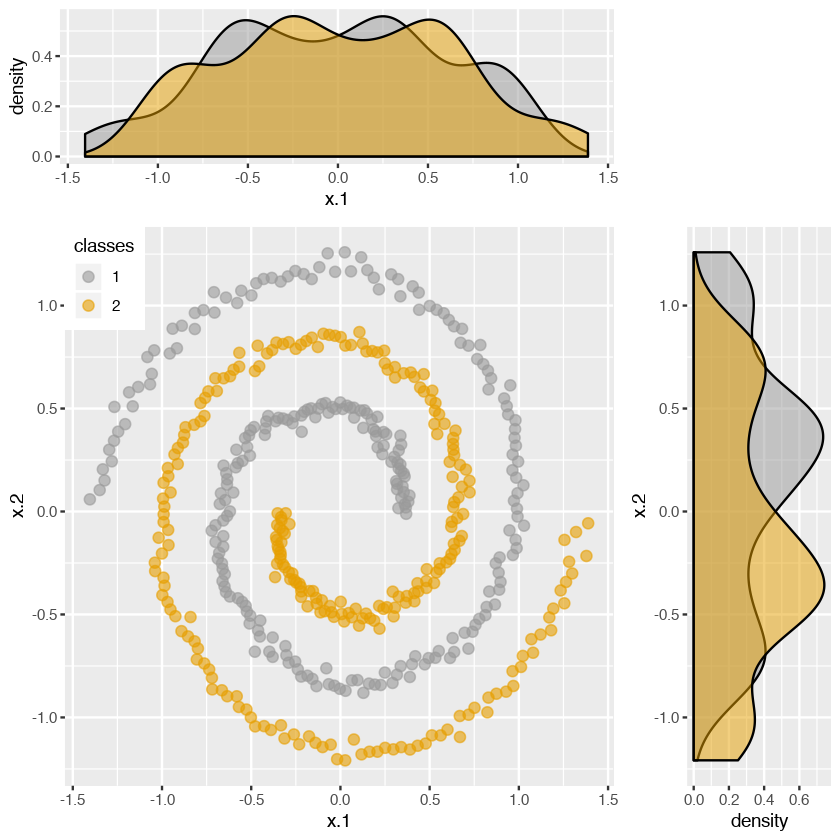

In [7]:
grid.arrange(xdensity, 
             blankPlot, 
             scatterPlot, 
             ydensity, 
             ncol = 2, 
             nrow = 2, 
             widths = c(4, 1.4), 
             heights = c(1.4, 4))

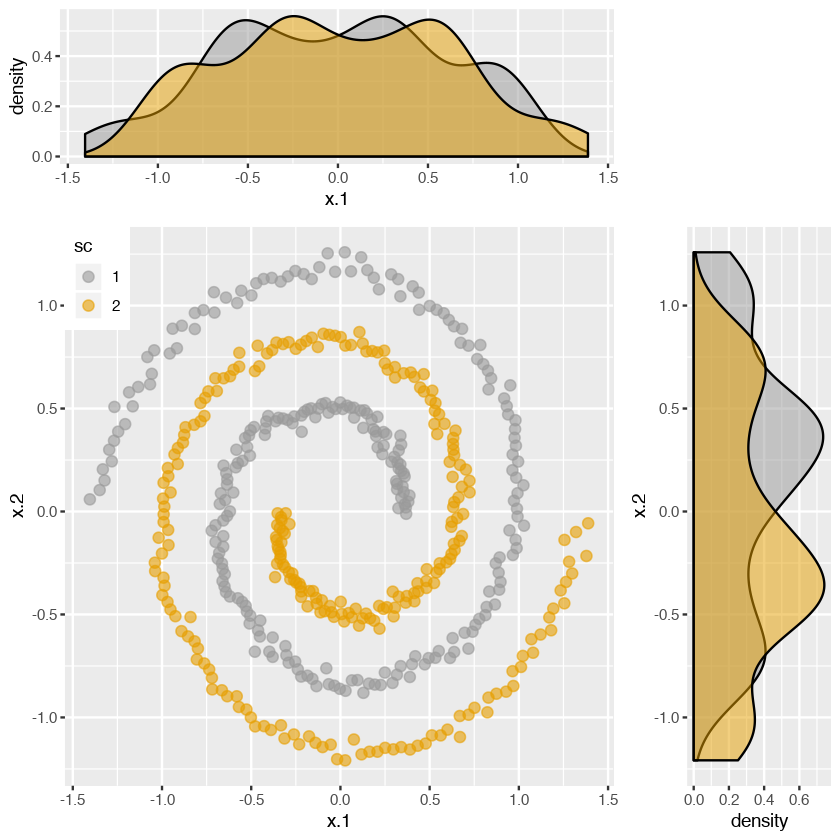

In [9]:
# Spectral clustering
for(no.clusters in 2:2) {
    data <- as.matrix(df[,1:2])
    sc <- specc(data,
                centers = no.clusters, 
                kernel = "rbfdot", 
                nystrom.red = FALSE, 
                iterations = 5000)

    # Append cluster assignment.
    data <- data.frame(data, sc)
    data$sc <- as.factor(data$sc)
    
    # Scatter plot of x and y variables - color by groups.
    scatterPlot <- ggplot(data, aes(x.1, x.2, color = sc)) + 
        geom_point(size = 2.5, alpha = 0.6) + 
        scale_color_manual(values = c('#999999','#E69F00','#9ac0cd','#4682b4','#6e8b3d','#ee7600','#8b1a1a','#cd1076','#8b8970','#473c8b')) + 
        theme(legend.position = c(0,1), legend.justification = c(0,1))

    # Marginal density plot of x (top panel)
    xdensity <- ggplot(data, aes(x.1, fill = sc)) + 
        geom_density(alpha = .5) + 
        scale_fill_manual(values = c('#999999','#E69F00','#9ac0cd','#4682b4','#6e8b3d','#ee7600','#8b1a1a','#cd1076','#8b8970','#473c8b')) + 
        theme(legend.position = "none")

    # Marginal density plot of y (right panel)
    ydensity <- ggplot(data, aes(x.2, fill = sc)) + 
        geom_density(alpha = .5) + 
        scale_fill_manual(values = c('#999999','#E69F00','#9ac0cd','#4682b4','#6e8b3d','#ee7600','#8b1a1a','#cd1076','#8b8970','#473c8b')) + 
        theme(legend.position = "none")  + 
        rotate()

    # Dummy plot that will act as a place-holder.
    blankPlot <- ggplot() + 
        geom_blank() + 
        theme(plot.background = element_blank(),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              panel.background = element_blank(),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              axis.text.x = element_blank(),
              axis.text.y = element_blank(),
              axis.ticks = element_blank())

    grid.arrange(xdensity, 
                 blankPlot, 
                 scatterPlot, 
                 ydensity, 
                 ncol = 2, 
                 nrow = 2, 
                 widths = c(4, 1.4), 
                 heights = c(1.4, 4))
}

In [10]:
print(sc)

Spectral Clustering object of class "specc" 

 Cluster memberships: 
 
1 2 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 1 1 2 1 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1 2 2 2 1 1 2 1 1 1 2 1 1 2 1 2 1 1 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 1 2 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2 2 2 1 1 1 1 2 1 1 2 1 1 2 2 2 2 1 1 1 1 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 1 2 1 2 1 2 1 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 1 2 1 1 1 1 2 2 2 1 1 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 2 2 1 1 1 1 2 1 1 1 2 2 2 2 2 1 1 2 1 2 1 2 1 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 1 2 2 1 1 2 1 1 2 1 2 1 1 2 1 1 2 1 1 2 2 1 2 1 2 1 1 2 1 2 1 1 2 1 1 2 1 2 1 1 1 1 2 2 2 1 1 1 2 2 2 2 1 2 2 1 1 1 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 2 2 1 1 1 1 2 1 2 2 1 1 2 2 2 2 1 1 2 2 2